<a href="https://colab.research.google.com/github/FokrulBhuiyan/Deep-learning-projects/blob/main/DLP_1_Blood_Cells_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mount dataset from kaggle

In [ ]:
# !pip install kaggle

In [ ]:
# from google.colab import files
# files.upload()  # Upload your kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fokrulbhuiyan","key":"6f00727b6ed18aef5b6673e64c6c760e"}'}

In [ ]:

# # Create the .kaggle directory if it doesn't exist
# os.makedirs('/root/.kaggle', exist_ok=True)
# # Move the kaggle.json to the correct location
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [ ]:
# !kaggle datasets download -d "unclesamulus/blood-cells-image-dataset" -p "/content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset"


Dataset URL: https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset
License(s): CC-BY-SA-4.0
 98% 262M/268M [00:03<00:00, 94.4MB/s]
100% 268M/268M [00:03<00:00, 84.8MB/s]


In [ ]:
# import zipfile

# # Path to the downloaded zip file
# zip_path = "/content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/blood-cells-image-dataset.zip"

# # Extract to a desired directory on Google Drive
# extract_path = '/content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset'

# # Extract the files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset


## Dataset prepocessing

### Packages

In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")


In [3]:
# Define the root directory where you want to start the count
base_path = '/content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset'

print(os.listdir(base_path))

# Function to count files and subdirectories
def count_files_in_subfolders(root_dir):
    # Iterate through each folder in the root directory
    for foldername, subfolders, filenames in os.walk(root_dir):
        # Skip the root directory itself and show counts for subfolders only
        if foldername != root_dir:
            num_files = len(filenames)
            print(f"Folder: {foldername}")
            print(f"  Files count: {num_files}")
            print(f"  Subfolders count: {len(subfolders)}")
            print('-' * 50)

# Call the function
count_files_in_subfolders(base_path)

['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
Folder: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset/basophil
  Files count: 1218
  Subfolders count: 0
--------------------------------------------------
Folder: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset/eosinophil
  Files count: 3117
  Subfolders count: 0
--------------------------------------------------
Folder: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset/erythroblast
  Files count: 1551
  Subfolders count: 0
--------------------------------------------------
Folder: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset/ig
  Files count: 2895
  Subfolders count: 0
--------------------------------------------------
Folder: /content/drive/MyDrive/30 Days DL/DLP-1 white blood cells/dataset/bloodcells_dataset/lymphocyte
  Files count: 

In [4]:
cell_types = ['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
data = []

# Define the maximum number of images per class
max_images_per_class = 1200

# Set a random seed for reproducibility
random.seed(42)

# Iterate over each cell type
for cell_type in cell_types:
    folder_path = os.path.join(base_path, cell_type)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # List all files in the folder
        files = [
            file for file in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, file))
        ]

        # Determine the number of files to sample
        if len(files) > max_images_per_class:
            sampled_files = random.sample(files, max_images_per_class)
            print(f"Sampling {max_images_per_class} from {cell_type} (Total: {len(files)})")
        else:
            sampled_files = files
            print(f"Using all {len(files)} from {cell_type}")

        # Append the sampled file paths and labels to the data list
        for file in sampled_files:
            file_path = os.path.join(folder_path, file)
            data.append({"Image_Path": file_path, "Label": cell_type})
    else:
        print(f"Folder not found: {folder_path}")

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("\nSample of the DataFrame:")
print(df.head())

print("\nNumber of samples per class:")
print(df['Label'].value_counts())

Sampling 1200 from basophil (Total: 1218)
Sampling 1200 from eosinophil (Total: 3117)
Sampling 1200 from erythroblast (Total: 1551)
Sampling 1200 from ig (Total: 2895)
Sampling 1200 from lymphocyte (Total: 1214)
Sampling 1200 from monocyte (Total: 1420)
Sampling 1200 from neutrophil (Total: 3329)
Sampling 1200 from platelet (Total: 2348)

Sample of the DataFrame:
                                          Image_Path     Label
0  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  basophil
1  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  basophil
2  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  basophil
3  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  basophil
4  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  basophil

Number of samples per class:
Label
basophil        1200
eosinophil      1200
erythroblast    1200
ig              1200
lymphocyte      1200
monocyte        1200
neutrophil      1200
platelet        1200
Name: count, dtype: int64


In [5]:
df.tail()


Image_Path     Label
9595  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  platelet
9596  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  platelet
9597  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  platelet
9598  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  platelet
9599  /content/drive/MyDrive/30 Days DL/DLP-1 white ...  platelet

In [6]:
df.shape

(9600, 2)

In [7]:
df.columns

Index(['Image_Path', 'Label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Image_Path    0
Label         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  9600 non-null   object
 1   Label       9600 non-null   object
dtypes: object(2)
memory usage: 150.1+ KB


In [11]:
df.nunique()


Image_Path    9600
Label            8
dtype: int64

<ipython-input-12-94284d9aa90a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label",


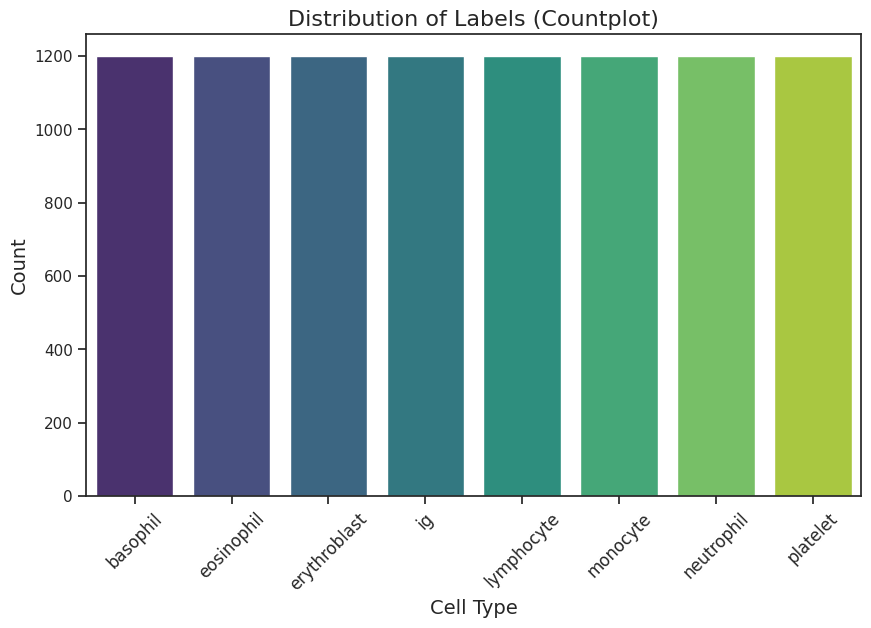

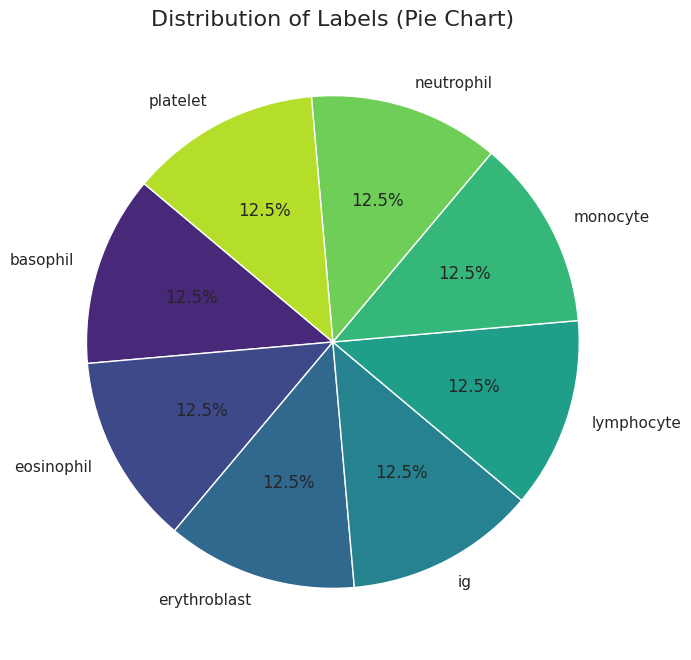

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Label",
order=df['Label'].value_counts().index, palette="viridis")
plt.title("Distribution of Labels (Countplot)", fontsize=16)
plt.xlabel("Cell Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()
plt.figure(figsize=(8, 8))
df['Label'].value_counts().plot.pie(
 autopct='%1.1f%%', startangle=140,
colors=sns.color_palette("viridis", len(df['Label'].unique()))
)
plt.title("Distribution of Labels (Pie Chart)", fontsize=16)
plt.ylabel("")
plt.show()

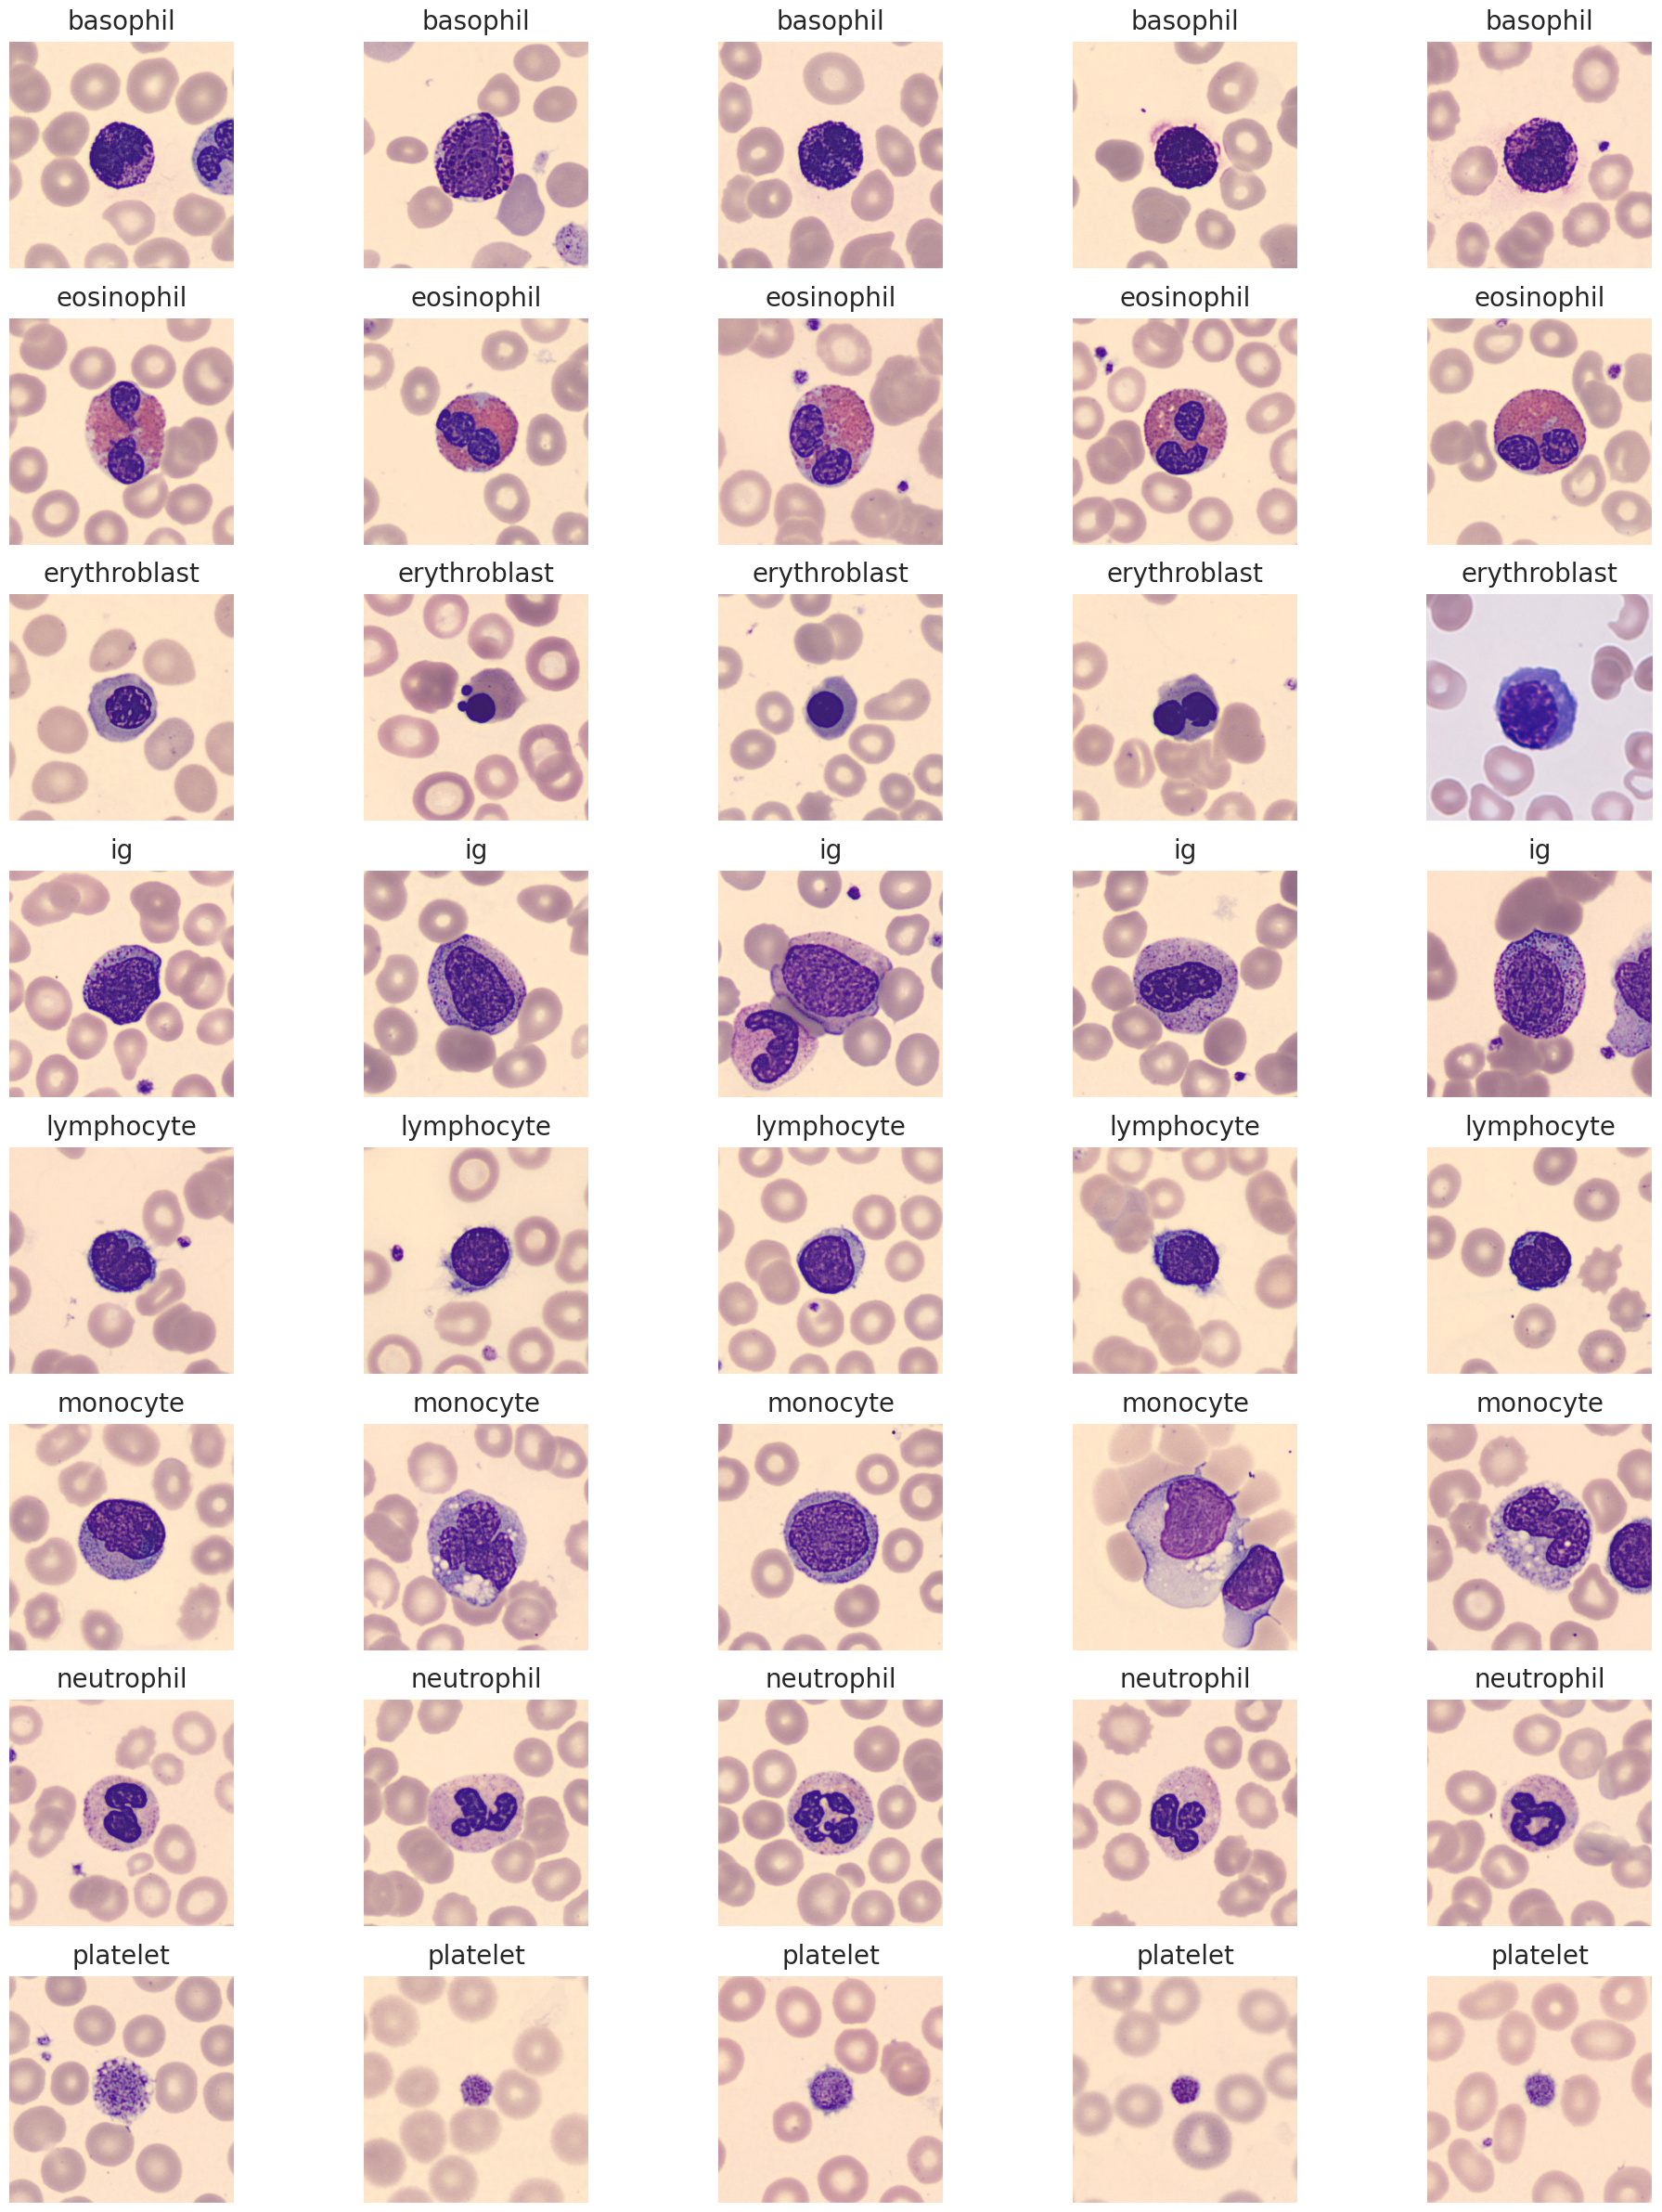

In [13]:
import cv2
# samples_per_category = 5
# plt.figure(figsize=(20, len(df['Label'].unique()) * 3))
# for idx, label in enumerate(df['Label'].unique()):
#   sample_images = df[df['Label'] == label].sample(n=samples_per_category, random_state=42)

#   for i, img_path in enumerate(sample_images['Image_Path']):
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     plt.subplot(len(df['Label'].unique()), samples_per_category, idx * samples_per_category + i + 1)
#     plt.imshow(img)
#     plt.axis('off')
#     if i == 0:
#       plt.ylabel(label, fontsize=14)
# plt.tight_layout()
# plt.show()
samples_per_category = 5
unique_labels = df['Label'].unique()
num_labels = len(unique_labels)

# Adjust the figure size: width = samples_per_category * 4, height = num_labels * 3
plt.figure(figsize=(samples_per_category * 4, num_labels * 3))

for idx, label in enumerate(unique_labels):
    # Sample 'samples_per_category' images per label
    sample_images = df[df['Label'] == label].sample(n=samples_per_category, random_state=42)

    for i, img_path in enumerate(sample_images['Image_Path']):
        # Read the image using OpenCV
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read image at path: {img_path}")
            continue  # Skip to the next image if reading fails

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Create a subplot for each image
        ax = plt.subplot(num_labels, samples_per_category, idx * samples_per_category + i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axis ticks and labels

        # Add the label as the title above each image
        ax.set_title(label, fontsize=20, pad=10)  # 'pad' adjusts the spacing between title and image

plt.tight_layout()
plt.show()

## Model Analysis

### Packages for model

In [14]:
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
 GlobalAveragePooling2D, Dense, Dropout,
 BatchNormalization, GaussianNoise, Input,
 MultiHeadAttention, Reshape
)
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

In [15]:
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
label_mapping = dict(zip(label_encoder.classes_,
label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)


Label Encoding Mapping:
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}


In [16]:
df['Label'] = df['Label'].astype(str)
train_df_new, temp_df_new = train_test_split(
  df,
  train_size=0.7,
  shuffle=True,
  random_state=42,
  stratify=df['Label']
)
valid_df_new, test_df_new = train_test_split(
  temp_df_new,
  test_size=0.5,
  shuffle=True,
  random_state=42,
  stratify=temp_df_new['Label']
)

batch_size = 16
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)
train_gen_new = tr_gen.flow_from_dataframe(
  train_df_new,
  x_col='Image_Path',
  y_col='Label',
  target_size=img_size,
  class_mode='sparse',
  color_mode='rgb',
  shuffle=True,
  batch_size=batch_size
)
valid_gen_new = ts_gen.flow_from_dataframe(
  valid_df_new,
  x_col='Image_Path',
  y_col='Label',
  target_size=img_size,
  class_mode='sparse',
  color_mode='rgb',
  shuffle=True,
  batch_size=batch_size
)
test_gen_new = ts_gen.flow_from_dataframe(
  test_df_new,
  x_col='Image_Path',
  y_col='Label',
  target_size=img_size,
  class_mode='sparse',
  color_mode='rgb',
  shuffle=False,
  batch_size=batch_size
)

Found 6720 validated image filenames belonging to 8 classes.
Found 1440 validated image filenames belonging to 8 classes.
Found 1440 validated image filenames belonging to 8 classes.


In [17]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
 print("Using GPU")
else:
 print("Using CPU")

Using GPU


### pre define

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
input_shape = (300, 300, 3)

### Xception model

In [19]:
from tensorflow.keras.applications import Xception

In [21]:
def create_xception_model(input_shape, num_classes=8, learning_rate=0.0001):
  inputs = Input(shape=input_shape, name="Input_Layer")
  base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
  base_model.trainable = False
  x = base_model.output
  height, width, channels = x.shape[1], x.shape[2], x.shape[3]
  x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
  attention_output = MultiHeadAttention(num_heads=8, key_dim=channels, name="Multi_Head_Attention")(x, x)
  attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
  x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
  x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
  x = Dense(512, activation='relu', name="FC_512")(x)
  x = BatchNormalization(name="Batch_Normalization")(x)
  x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
  x = Dropout(0.25, name="Dropout")(x)
  outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
  model = Model(inputs=inputs, outputs=outputs, name="Xception_with_Attention")
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


cnn_model = create_xception_model(input_shape, num_classes=8, learning_rate=0.0001)
history = cnn_model.fit(
  train_gen_new,
  validation_data=valid_gen_new,
  epochs=5,
  callbacks=[early_stopping],
  verbose=1
)

Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 2319s 5s/step - accuracy: 0.7063 - loss: 0.8955 - val_accuracy: 0.8590 - val_loss: 0.4122
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 231s 432ms/step - accuracy: 0.8797 - loss: 0.3430 - val_accuracy: 0.6049 - val_loss: 2.0076
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 181s 430ms/step - accuracy: 0.9091 - loss: 0.2609 - val_accuracy: 0.8813 - val_loss: 0.4150
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 181s 430ms/step - accuracy: 0.9302 - loss: 0.2037 - val_accuracy: 0.7799 - val_loss: 0.8584
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 181s 430ms/step - accuracy: 0.9397 - loss: 0.1733 - val_accuracy: 0.8000 - val_loss: 0.9463


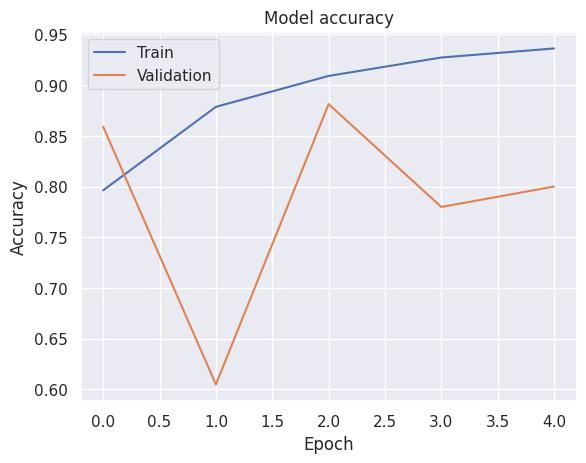

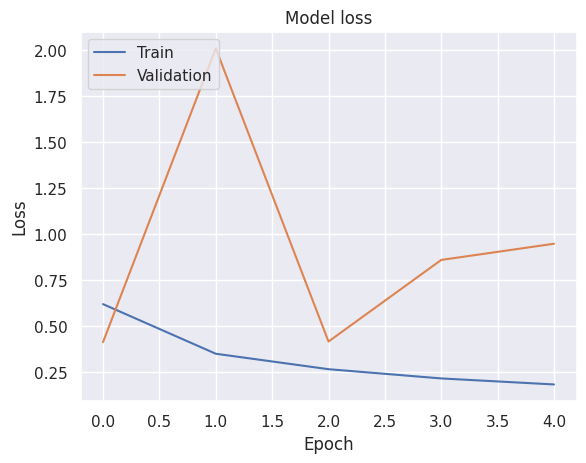

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

90/90 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step


In [24]:
report = classification_report(test_labels, predicted_classes,
target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

    basophil       0.97      0.86      0.91       180
  eosinophil       0.98      0.93      0.95       180
erythroblast       0.87      0.91      0.89       180
          ig       0.71      0.82      0.76       180
  lymphocyte       0.67      0.97      0.80       180
    monocyte       0.91      0.69      0.79       180
  neutrophil       0.98      0.72      0.83       180
    platelet       0.95      0.97      0.96       180

    accuracy                           0.86      1440
   macro avg       0.88      0.86      0.86      1440
weighted avg       0.88      0.86      0.86      1440



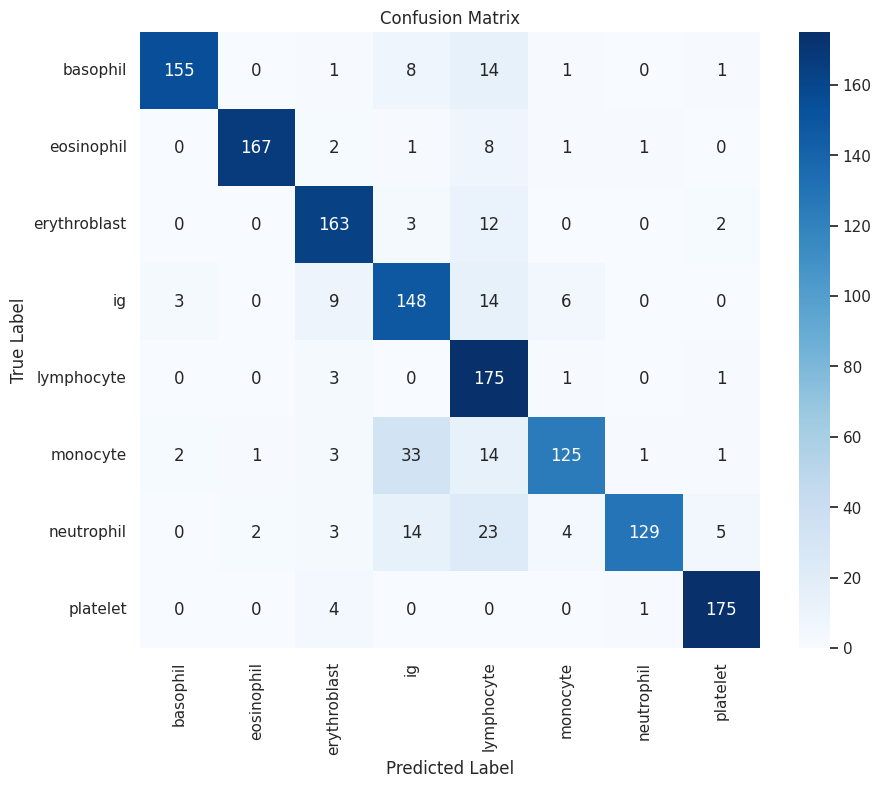

In [25]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=list(test_gen_new.class_indices.keys()),
yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### MobileNet model

In [26]:
from tensorflow.keras.applications import MobileNet


In [27]:
def create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001):
  inputs = Input(shape=input_shape, name="Input_Layer")
  base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
  base_model.trainable = False
  x = base_model.output
  height, width, channels = x.shape[1], x.shape[2], x.shape[3]
  x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
  attention_output = MultiHeadAttention(num_heads=8, key_dim=channels, name="Multi_Head_Attention")(x, x)
  attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
  x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
  x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
  x = Dense(512, activation='relu', name="FC_512")(x)
  x = BatchNormalization(name="Batch_Normalization")(x)
  x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
  x = Dropout(0.25, name="Dropout")(x)
  outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
  model = Model(inputs=inputs, outputs=outputs, name="MobileNet_with_Attention")
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

cnn_model = create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001)
history = cnn_model.fit(
  train_gen_new,
  validation_data=valid_gen_new,
  epochs=5,
  callbacks=[early_stopping],
  verbose=1
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 72s 135ms/step - accuracy: 0.7999 - loss: 0.6008 - val_accuracy: 0.8917 - val_loss: 0.3911
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.9448 - loss: 0.1616 - val_accuracy: 0.7639 - val_loss: 0.7441
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - accuracy: 0.9643 - loss: 0.1059 - val_accuracy: 0.9007 - val_loss: 0.3227
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.9797 - loss: 0.0605 - val_accuracy: 0.8944 - val_loss: 0.3928
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step - accuracy: 0.9727 - loss: 0.0785 - val_accuracy: 0.9187 - val_loss: 0.2772


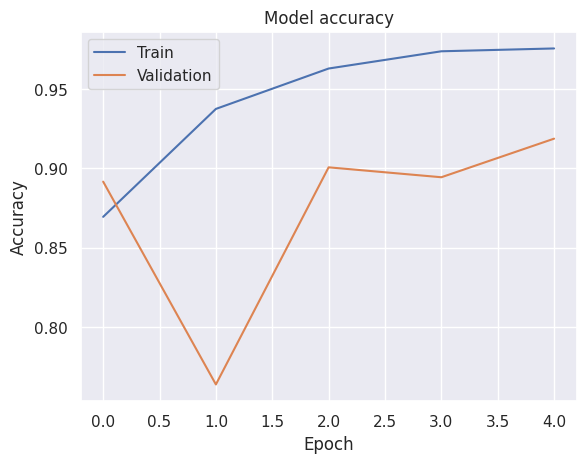

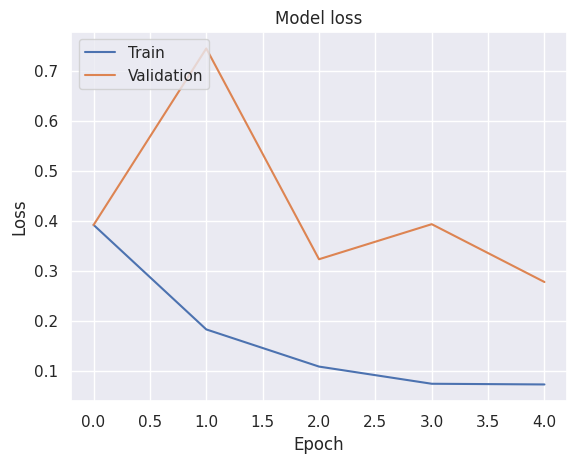

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step


In [30]:
report = classification_report(test_labels, predicted_classes,
target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

    basophil       0.96      0.96      0.96       180
  eosinophil       0.96      0.99      0.98       180
erythroblast       0.97      0.92      0.94       180
          ig       0.80      0.91      0.85       180
  lymphocyte       0.90      1.00      0.95       180
    monocyte       0.93      0.86      0.89       180
  neutrophil       0.98      0.89      0.94       180
    platelet       1.00      0.94      0.97       180

    accuracy                           0.93      1440
   macro avg       0.94      0.93      0.93      1440
weighted avg       0.94      0.93      0.93      1440



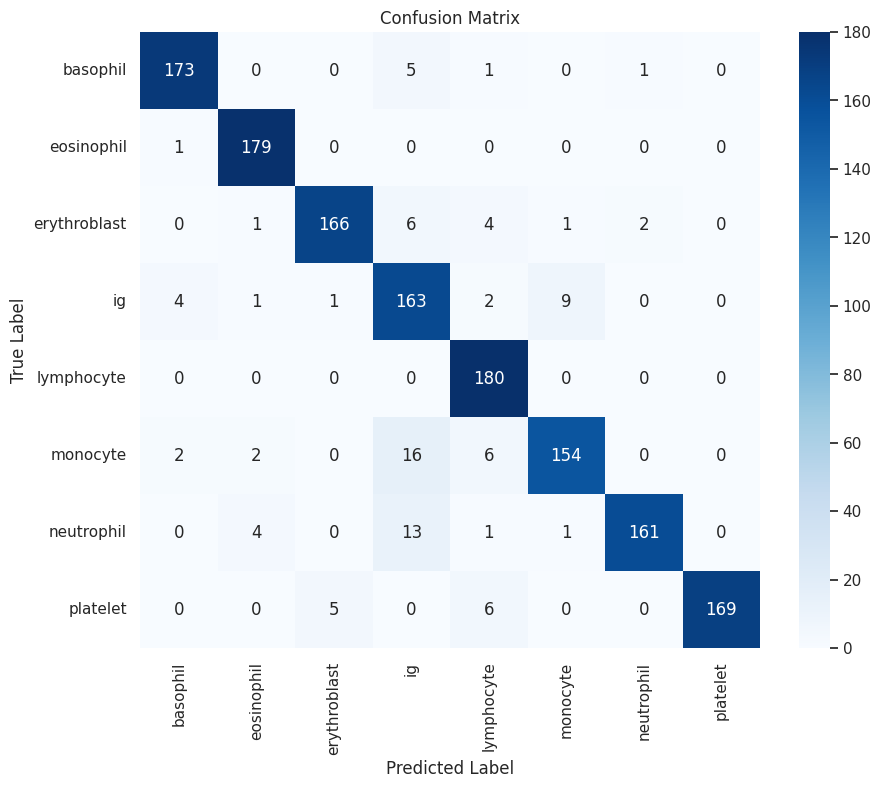

In [31]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=list(test_gen_new.class_indices.keys()),
yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
